# Import

In [5]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_rel

# File

In [6]:
FILE = "results/grid_search_SRMP_1000/train_results.csv"

# Read file

In [7]:
df = pd.read_csv(FILE)
df

,M,N_tr,Atr_id,Mo,Ko,Mo_id,N_bc,Error,Me,Ke,Method,Config,Time,Fitness,It.
0,11,500,0,SRMP,3,2,1000,0,SRMP,3,SA,28,263.931520,1.000,14035
1,11,500,0,SRMP,3,2,1000,0,SRMP,3,SA,30,345.683800,1.000,18367
2,11,500,0,SRMP,3,2,1000,0,SRMP,3,SA,20,361.104487,0.996,20000
3,11,500,0,SRMP,3,2,1000,0,SRMP,3,SA,33,361.550075,0.998,20000
4,11,500,0,SRMP,3,2,1000,0,SRMP,3,SA,31,361.582096,0.975,20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,11,500,0,SRMP,3,43,1000,0,SRMP,3,SA,122,255.861862,0.922,20000
6246,11,500,0,SRMP,3,43,1000,0,SRMP,3,SA,116,356.405227,0.945,20000
6247,11,500,0,SRMP,3,43,1000,0,SRMP,3,SA,121,312.046354,0.912,20000
6248,11,500,0,SRMP,3,43,1000,0,SRMP,3,SA,124,279.356243,0.922,20000


# Configs

In [8]:
from run.config import SAConfig

In [9]:
CONFIGS = "results/grid_search_SRMP_1000/configs.csv"
df_config = pd.read_csv(CONFIGS, index_col=[0, 1])
df_config.drop(df_config.tail(1).index, inplace=True)
for id, row in df_config.iterrows():
    config = eval(row["Config"])
    df_config.loc[id, "T0_coef"] = config.T0_coef
    df_config.loc[id, "alpha"] = config.alpha
    df_config.loc[id, "amp"] = config.amp
df_config.drop(columns="Config", inplace=True)
df_config

TypeError: SAConfig.__init__() missing 2 required positional arguments: 'id' and 'method'

In [ ]:
df = df.join(df_config, on=["Method", "Config"])
df

,M,N_tr,Atr_id,Mo,Ko,Mo_id,N_bc,Error,Me,Ke,Method,Config,Time,Fitness,It.,T0_coef,alpha,amp
0,11,500,0,SRMP,3,2,1000,0,SRMP,3,SA,28,263.931520,1.000,14035,0.5,0.99900,0.4
1,11,500,0,SRMP,3,2,1000,0,SRMP,3,SA,30,345.683800,1.000,18367,0.5,0.99950,0.1
2,11,500,0,SRMP,3,2,1000,0,SRMP,3,SA,20,361.104487,0.996,20000,0.1,0.99999,0.1
3,11,500,0,SRMP,3,2,1000,0,SRMP,3,SA,33,361.550075,0.998,20000,0.5,0.99950,0.4
4,11,500,0,SRMP,3,2,1000,0,SRMP,3,SA,31,361.582096,0.975,20000,0.5,0.99950,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,11,500,0,SRMP,3,43,1000,0,SRMP,3,SA,122,255.861862,0.922,20000,10.0,0.99999,0.3
6246,11,500,0,SRMP,3,43,1000,0,SRMP,3,SA,116,356.405227,0.945,20000,10.0,0.99995,0.2
6247,11,500,0,SRMP,3,43,1000,0,SRMP,3,SA,121,312.046354,0.912,20000,10.0,0.99999,0.2
6248,11,500,0,SRMP,3,43,1000,0,SRMP,3,SA,124,279.356243,0.922,20000,10.0,0.99999,0.5


In [ ]:
df_grouped = df.groupby("Config").mean(True).sort_values("Fitness", ascending=False)
df_grouped

,M,N_tr,Atr_id,Ko,Mo_id,N_bc,Error,Ke,Time,Fitness,It.,T0_coef,alpha,amp
Config,,,,,,,,,,,,,,
60,11.0,500.0,0.0,3.0,24.5,1000.0,0.0,3.0,387.205209,0.99680,19251.42,1.0,0.99990,0.1
45,11.0,500.0,0.0,3.0,24.5,1000.0,0.0,3.0,386.906930,0.99624,19465.44,0.5,0.99999,0.1
105,11.0,500.0,0.0,3.0,24.5,1000.0,0.0,3.0,384.295260,0.99614,19388.32,10.0,0.99950,0.1
40,11.0,500.0,0.0,3.0,24.5,1000.0,0.0,3.0,357.702734,0.99580,18232.30,0.5,0.99995,0.1
61,11.0,500.0,0.0,3.0,24.5,1000.0,0.0,3.0,384.461963,0.99554,19492.54,1.0,0.99990,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,11.0,500.0,0.0,3.0,24.5,1000.0,0.0,3.0,377.186542,0.91478,20000.00,10.0,0.99999,0.3
120,11.0,500.0,0.0,3.0,24.5,1000.0,0.0,3.0,383.776753,0.91424,20000.00,10.0,0.99999,0.1
121,11.0,500.0,0.0,3.0,24.5,1000.0,0.0,3.0,390.642047,0.91248,20000.00,10.0,0.99999,0.2


# Plot

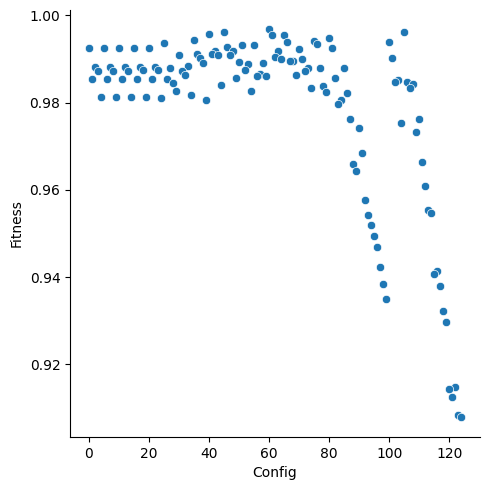

In [ ]:
sns.relplot(df_grouped, x="Config", y="Fitness")

In [ ]:
best = {df_grouped["Fitness"].idxmax()}
rest = set(df_grouped.index) - best

In [ ]:
i = 0
for config in rest:
    if all(not (ttest_rel(df.loc[df["Config"] == config, "Fitness"], df.loc[df["Config"] == config_best, "Fitness"], alternative="less").pvalue < 0.05) for config_best in best):
        best.add(config)
        rest -= best
    else:
        i+=1
    print(best)
    if i >= 20:
        break
best

0: {40, 105, 45, 80, 60, 61}
1: {40, 105, 45, 80, 60, 61}
2: {40, 105, 45, 80, 60, 61}
3: {40, 105, 45, 80, 60, 61}
4: {40, 105, 45, 80, 60, 61}
5: {40, 105, 45, 80, 60, 61}
6: {40, 105, 45, 80, 60, 61}
7: {40, 105, 45, 80, 60, 61}
8: {40, 105, 45, 80, 60, 61}
9: {40, 105, 45, 80, 60, 61}
10: {40, 105, 45, 80, 60, 61}
11: {40, 105, 45, 80, 60, 61}
12: {40, 105, 45, 80, 60, 61}
13: {40, 105, 45, 80, 60, 61}
14: {40, 105, 45, 80, 60, 61}
15: {40, 105, 45, 80, 60, 61}
16: {40, 105, 45, 80, 60, 61}
17: {40, 105, 45, 80, 60, 61}
18: {40, 105, 45, 80, 60, 61}
19: {40, 105, 45, 80, 60, 61}


{40, 45, 60, 61, 80, 105}

In [ ]:
df_config.loc[("SA", 40)]

In [ ]:
df_config.loc[[("SA", 40), ("SA", 45), ("SA", 60), ("SA", 61), ("SA", 80), ("SA", 105)]]

T0_coef    alpha  amp
Method Id                        
SA     40       0.5  0.99995  0.1
       45       0.5  0.99999  0.1
       60       1.0  0.99990  0.1
       61       1.0  0.99990  0.2
       80       5.0  0.99950  0.1
       105     10.0  0.99950  0.1

In [ ]:
ttest_rel(df.loc[df["Config"] == 61, "Fitness"], df.loc[df["Config"] == 60, "Fitness"], alternative="greater")

TtestResult(statistic=-1.3445309415012652, pvalue=0.9075159367396248, df=49)

In [ ]:
ttest_rel([0.6, 0.4, 0.2], [1, 1, 1], alternative="less")

TtestResult(statistic=-5.196152422706631, pvalue=0.017549359322992328, df=2)

In [ ]:
df.loc[df["Config"] == 60, "Fitness"].mean()

0.9968

In [ ]:
df.loc[df["Config"] == 61, "Fitness"].mean()

0.9955399999999999

In [ ]:
df.loc[df["Config"] == 60, "Fitness"]

61      0.998
189     0.999
313     0.998
434     0.989
562     0.999
685     0.999
811     0.997
936     0.996
1057    0.999
1186    0.999
1313    0.996
1429    1.000
1547    1.000
1684    0.986
1808    0.999
1937    0.999
2051    1.000
2185    0.998
2296    1.000
2436    0.997
2560    0.996
2689    0.999
2811    0.999
2940    0.998
3067    0.996
3178    0.996
3317    0.999
3434    0.998
3563    0.996
3680    1.000
3814    0.999
3936    0.995
4060    0.995
4179    1.000
4311    1.000
4434    0.998
4564    0.998
4691    0.999
4812    0.989
4935    1.000
5059    0.993
5183    0.999
5309    0.982
5436    0.980
5564    0.996
5685    0.999
5815    0.998
5938    0.998
6062    0.997
6185    1.000
Name: Fitness, dtype: float64

In [ ]:
df.loc[df["Config"] == 40, "Fitness"]

7       1.00
174     1.00
299     0.99
413     1.00
531     1.00
646     1.00
762     1.00
896     1.00
1018    1.00
1136    1.00
Name: Fitness, dtype: float64

In [ ]:
df.loc[df["Config"] == 89, "Fitness"]

83      0.98
222     1.00
348     0.97
468     0.92
596     0.98
720     0.97
845     0.96
969     0.97
1093    0.95
1217    0.92
Name: Fitness, dtype: float64

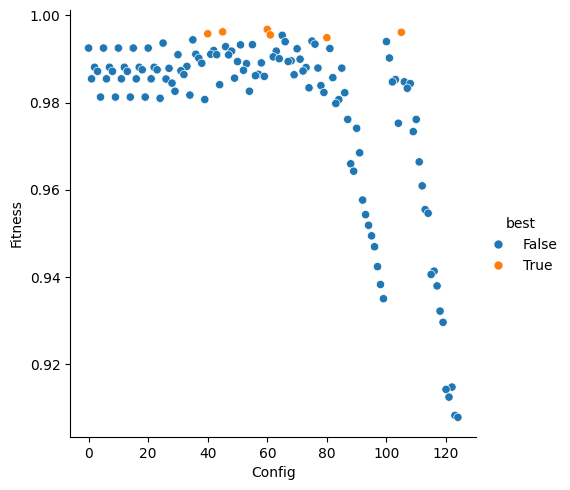

In [ ]:
df_grouped_bis = df_grouped.copy()
df_grouped_bis["best"] = [x in best for x in df_grouped_bis.index]
sns.relplot(df_grouped_bis, x="Config", y="Fitness", hue="best")

In [ ]:
df["Time"].std()

50.08306887344723